In [1]:
#importando a base já tratada em outro projeto
import pandas as pd 

base_limpa = pd.read_csv("base_limpa.csv")

base_limpa.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,uninformed,United States,"September 25, 2021",2020,R-A,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,uninformed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,R+17,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",uninformed,"September 24, 2021",2021,R+17,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [2]:
#começarei fazendo um gráfico para a quantidade de cada tipo de filme(movie, TV_Show), para fazer isso eu tenho que pegar a quantidade de valores de cada tipo
qtd_movie = base_limpa['type'].value_counts()[0]
qtd_tvshow = base_limpa['type'].value_counts()[1]

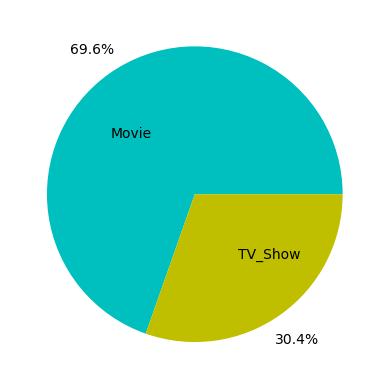

In [3]:
import matplotlib.pyplot as plt #importando a biblioteca que será usada para esse e para os outros gráficos

valores = [qtd_movie, qtd_tvshow] #vamos passar os dados para a variável valores

fig, ax = plt.subplots() 

labels = 'Movie', 'TV_Show' #passando os labels para especificar no gráfico
ax.pie(valores, #o gráfico escolhido foi o de pizza(PIE)
        labels=labels, #colocando os labels na figura
        autopct='%1.1f%%', #passando a porcentagem que cada valor ocupa em toda figura
        pctdistance=1.2, #distancia dos valores de porcentagem
        labeldistance=.5, #distancia dos labels
        colors=['c', 'y']) #passando as cores


plt.show() #mostrando a figura

In [4]:
#Considerei que no gráfico de ratings eu iria utilizar apenas o 3 principais(adulto, adolescente e infantil), peguei os valores e guardei em variáveis
qtd_adulto = base_limpa['rating'].value_counts().head(3)[0]
qtd_adolescente = base_limpa['rating'].value_counts().head(3)[1]
qtd_crianca = base_limpa['rating'].value_counts().head(3)[2]

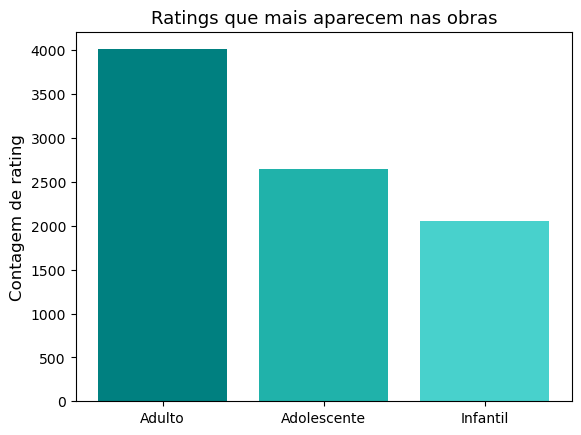

In [5]:
fig, ax = plt.subplots()

classificacao = ['Adulto', 'Adolescente', 'Infantil'] #passando a classificação de cada rating
contagem = [qtd_adulto, qtd_adolescente, qtd_crianca] #os valores de cada classificação
cores = ['teal', 'lightseagreen', 'mediumturquoise'] #passando as cores em uma lista


ax.bar(classificacao, contagem, color=cores) #criando o gráfico de barra e passando as cores
ax.set_title('Ratings que mais aparecem nas obras', #Escrevendo o título e escolhendo o tamando da letra
            {'fontsize': 13})
ax.set_ylabel('Contagem de rating', {'fontsize': 12})



plt.show()

In [6]:
base_movie = base_limpa[base_limpa['type'] == 'Movie'] #Criando uma base só com os dados de filmes

base_movie = base_movie.groupby('country')['type'].count().sort_values(ascending=False).head(10) #criando um groupby de países com mais filmes na netflix e pegando os 10 primeiros valores, e passando a variável base_movie

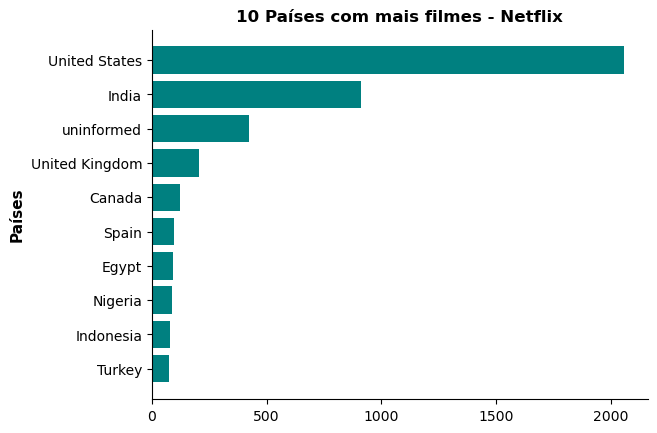

In [7]:
import numpy as np
fig, ax = plt.subplots()

ax.barh(base_movie.index[::-1], 
        base_movie.values[::-1], 
        color='teal') #passando como x o index dos países e em y os valores da quantidade de filmes desses países

ax.spines['top'].set_visible(False) #apagando borda de cima e da direita
ax.spines['right'].set_visible(False)

ax.set(xticks=np.arange(0, 2500, 500)) #passando os valores do eixo x
plt.title("10 Países com mais filmes - Netflix", 
        fontsize = 12, 
        fontweight = 'bold') #colocando um título e customizando ele

plt.ylabel("Países", 
        fontsize = 11, 
        fontweight = 'bold') #colocando o nome países no eixo y para deixar mais bonito

plt.show()

In [8]:
base_tv_show = base_limpa[base_limpa['type'] == 'TV Show']#Criando uma base só com os dados de TV_Shows

base_tv_show = base_tv_show.groupby('country')['type'].count().sort_values(ascending=False).head(10) #criando um groupby de países com mais TV_Shows na netflix e pegando os 10 primeiros valores, e passando a variável base_tv_show

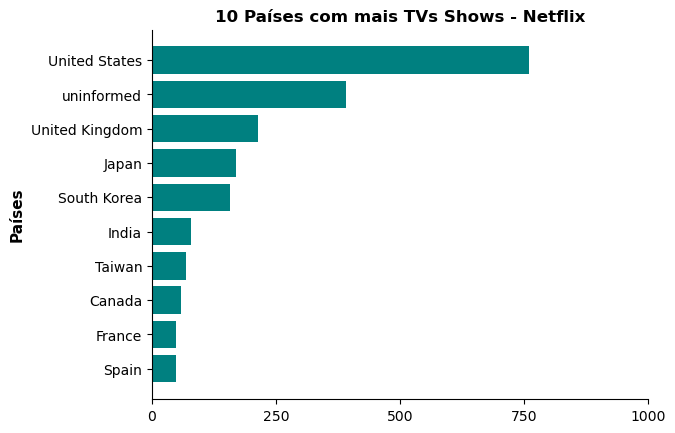

In [9]:
fig, ax = plt.subplots()

ax.barh(base_tv_show.index[::-1], 
        base_tv_show.values[::-1], 
        color='teal') #passando como x o index dos países e em y os valores da quantidade de TV_Shows desses países

ax.spines['top'].set_visible(False) #apagando borda de cima e da direita
ax.spines['right'].set_visible(False)

ax.set(xticks=np.arange(0, 1250, 250)) #passando os valores do eixo x
plt.title("10 Países com mais TVs Shows - Netflix", 
        fontsize = 12, 
        fontweight = 'bold') #colocando um título e customizando ele

plt.ylabel("Países", 
        fontsize = 11, 
        fontweight = 'bold') #colocando o nome países no eixo y para deixar mais bonito

plt.show()

In [10]:
from wordcloud import WordCloud #essa biblioteca serve para analisar a frequencia de uma palavra

In [11]:
base_limpa['description'] #pegando as descrições das obars

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [12]:
descricao = ''
for i in base_limpa['description']:
    if i:
        descricao += i
        descricao += ''
#criando um for para pegar todas as palavras da coluna description e passando para variável descricao

In [13]:
WCd = WordCloud().generate(descricao) #passando a função da biblioteca com as palavras

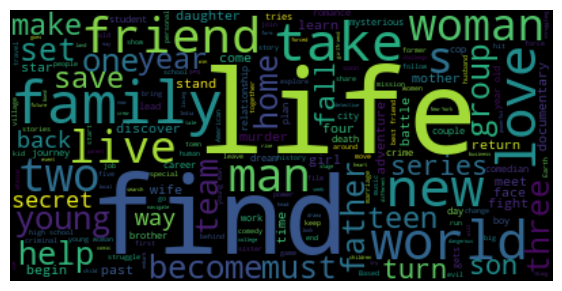

In [14]:
#criando a figura
plt.figure(figsize=[7,8])
plt.imshow(WCd, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
base_limpa['title']

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8807, dtype: object

In [16]:
titulo = ''
for i in base_limpa['title']:
    if i:
        titulo += i
        titulo += ''

In [17]:
WCd2 = WordCloud().generate(titulo)

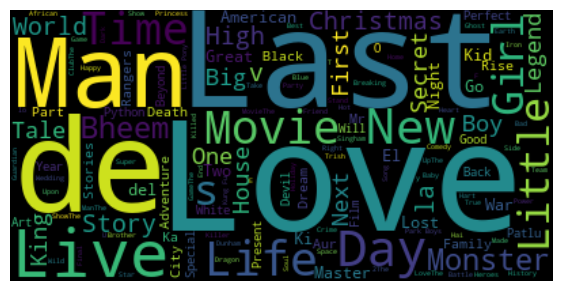

In [18]:
plt.figure(figsize=[7,8])
plt.imshow(WCd2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
base_limpa.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,uninformed,United States,"September 25, 2021",2020,R-A,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,uninformed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,R+17,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [20]:
base_ano = base_limpa.query("release_year >= 2007") #pegando os filmes e tv_shows lançados a partir de 2007 e passando na variável base_ano
base_ano = base_ano[['type', 'release_year', 'show_id']] #pegando apenas as colunas necessárias para a base_ano

base_ano = base_ano.groupby(['type', 'release_year'])['show_id'].count().reset_index() #agrupando a quantidade de filmes e tv_shows lançados a partir de 2007
base_ano = base_ano.rename(columns={'show_id': 'qtd_obras'}) #renomenado a coluna de show id que estava mostrando a quantidade de obras em cada ano

base_ano_movie = base_ano.query("type == 'Movie'") #dividindo por tipos agora
base_ano_tvShow = base_ano.query("type == 'TV Show'")

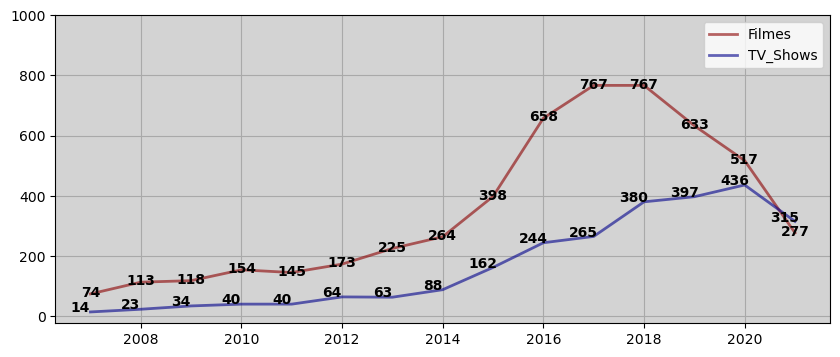

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(base_ano_movie['release_year'].values, #pegando os valores de anos
        base_ano_movie['qtd_obras'].values, #pegando a quantidade de filmes por ano
        linewidth=2.0, #largura da linha
        label='Filmes', #Adicionando uma legenda pra indicar que essa linha pertence a filmes
        color='darkred', #cor da linha
        alpha=0.6) #opacidade da linha

ax.plot(base_ano_tvShow['release_year'].values, #pegando os valores de anos
        base_ano_tvShow['qtd_obras'].values, #pegando a quantidade de tv_shows por ano
        linewidth=2.0, #largura da linha
        label='TV_Shows', #Adicionando uma legenda pra indicar que essa linha pertence a tv_shows
        color='darkblue', #cor da linha
        alpha=0.6) #opacidade da linha
#fazendo um laço para colocar cada valor em cima da linha de acordo com seu respectivo ano
for i in np.arange(0,15):
        ax.annotate(base_ano_movie['qtd_obras'].values[i], xy=(base_ano_movie['release_year'].values[i],base_ano_movie['qtd_obras'].values[i]-10),horizontalalignment='center', fontweight='bold')
for i in np.arange(0,15):
        ax.annotate(base_ano_tvShow['qtd_obras'].values[i], xy=(base_ano_tvShow['release_year'].values[i]-0.2,base_ano_tvShow['qtd_obras'].values[i]),horizontalalignment='center', fontweight='bold')
#Ajustando o eixo y
plt.yticks(np.arange(0, 1200, 200))
ax.set_facecolor("lightgrey") #mudando a cor de fundo

ax.grid(color='darkgrey') #adicionando essas linhas de fundo para melhorar a visualização
ax.legend() #Mostrando no gráfico os labels
plt.show() #mostrando o gráfico